In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
import warnings 
warnings.filterwarnings(action='ignore')


In [3]:
df = pd.read_csv("C:/Users/neeraj/Desktop/Titanic-Dataset.csv")


In [4]:
df.sample(frac=0.1,random_state=20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean().round())
df.drop(columns=["Cabin","Name","PassengerId","Ticket"],inplace=True)

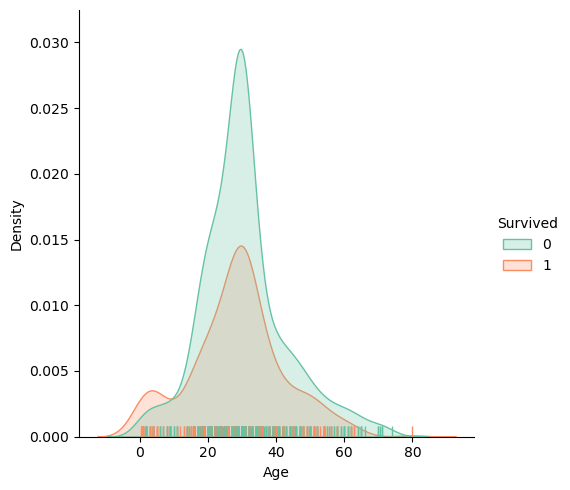

In [6]:
sns.displot(x='Age',hue='Survived',palette='Set2',data=df,fill=True,rug=True,kind='kde');

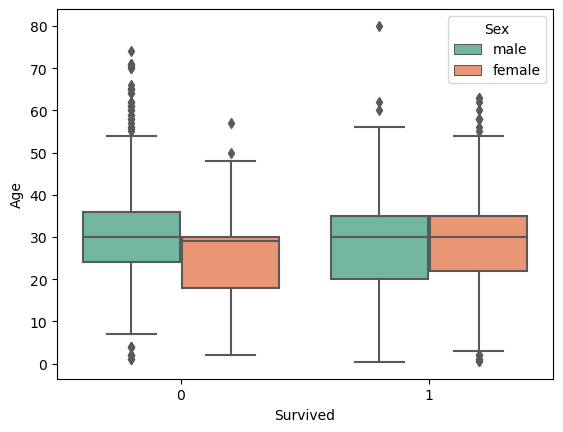

In [7]:
sns.boxplot(x='Survived',y='Age',hue='Sex',palette='Set2',data=df);


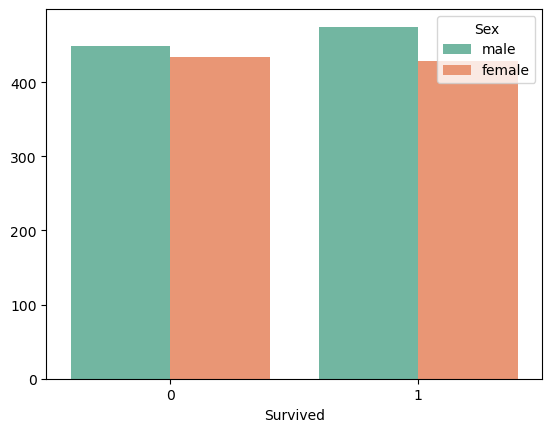

In [8]:
sns.barplot(x='Survived',y=np.arange(0,len(df)),ci=None,hue='Sex',palette='Set2',data=df);

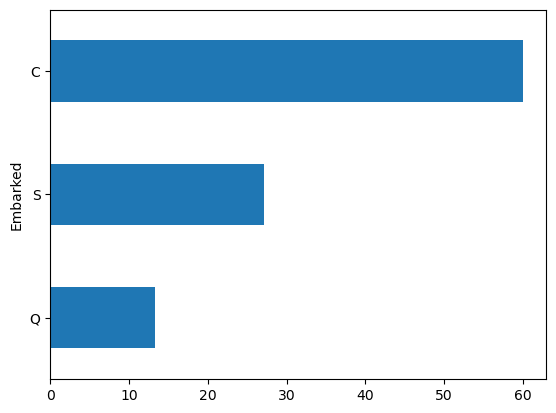

In [9]:
df.groupby("Embarked")["Fare"].mean().sort_values().plot(kind="barh");

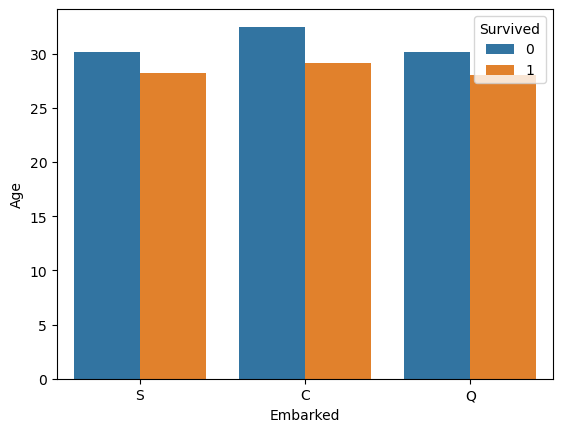

In [10]:
sns.barplot(x='Embarked',ci=None,y="Age",hue='Survived',data=df);

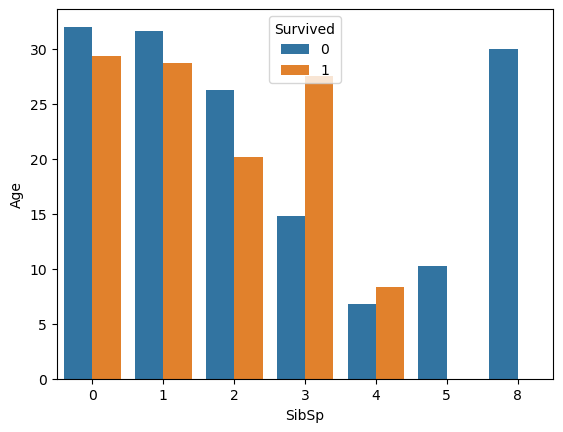

In [11]:
sns.barplot(x='SibSp',y='Age',ci=None,hue='Survived',data=df);

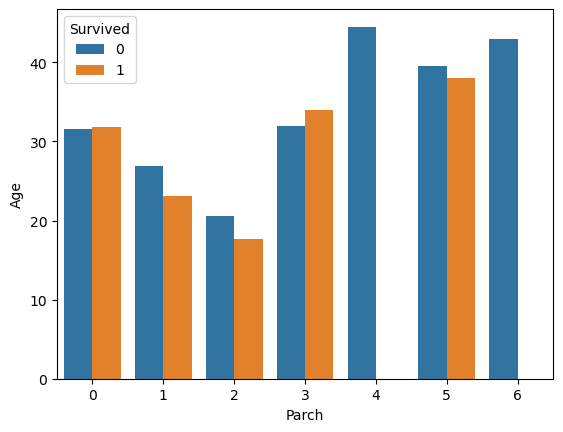

In [12]:
sns.barplot(x='Parch',y='Age',ci=None,hue='Survived',data=df);

In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [14]:
df['Sex'] = pd.get_dummies(df['Sex'],drop_first=True)

In [15]:
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])

In [16]:
print(f"embarked {df.Embarked.unique()}\t||\tsex{df.Sex.unique()}")


embarked [2 0 1 3]	||	sex[1 0]


In [17]:
df.dtypes

Survived      int64
Pclass        int64
Sex           uint8
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [18]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [19]:
df.sample(frac=0.2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
697,1,3,0,30.0,0,0,7.7333,1
431,1,3,0,30.0,1,0,16.1000,2
674,0,2,1,30.0,0,0,0.0000,2
881,0,3,1,33.0,0,0,7.8958,2
341,1,1,0,24.0,3,2,263.0000,2
...,...,...,...,...,...,...,...,...
483,1,3,0,63.0,0,0,9.5875,2
74,1,3,1,32.0,0,0,56.4958,2
193,1,2,1,3.0,1,1,26.0000,2
505,0,1,1,18.0,1,0,108.9000,0


In [20]:
X = df[[col for col in df.columns if col !="Survived"]]
y = df['Survived']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression()

In [23]:
logReg.score(X_test,y_test)

0.8100558659217877

In [24]:
logReg_score = logReg.score(X_test,y_test)

In [25]:
accuracy_score(y_test,logReg.predict(X_test))

0.8100558659217877

In [26]:
svc  = SVC()
svc.fit(X_train,y_train)

SVC()

In [27]:
pred = svc.predict(X_test)

In [28]:
svc.score(X_test,y_test)

0.659217877094972

In [29]:
cs = np.arange(0.1,10,0.1)
c_accuracies = []
for c in cs:
    model = SVC(C=c)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    c_accuracies.append(accuracy_score(y_test,y_pred))

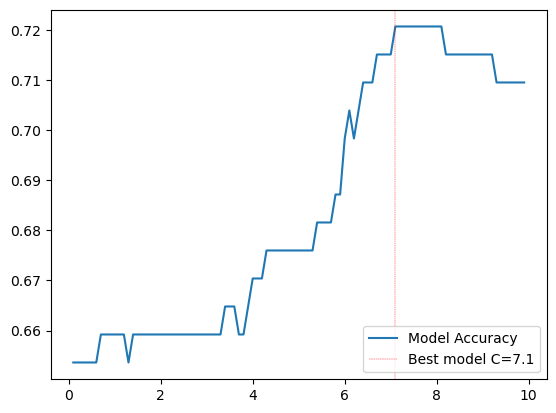

In [30]:
plt.plot(cs,c_accuracies,label="Model Accuracy")
plt.axvline(7.1,linewidth=0.3,linestyle='--',color='r',label='Best model C=7.1')
plt.legend(loc='lower right');


In [41]:
svc_model = SVC(C=7.1)
svc_model.fit(X_train,y_train)

SVC(C=7.1)

In [42]:
svc_model.score(X_test,y_test)

0.7206703910614525

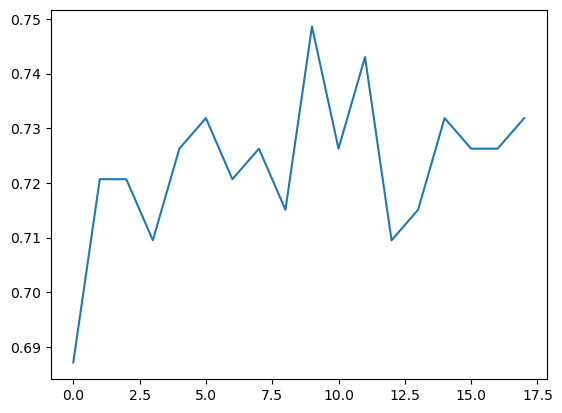

In [43]:
svc_model_score = svc_model.score(X_test,y_test)
ks = np.arange(2,20)
ks_scores = []
for k in ks :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    ks_scores.append(knn.score(X_test,y_test))
plt.plot(ks_scores);

In [44]:
knn_model =KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train,y_train)
knn_score = knn.score(X_test,y_test)
dt = DecisionTreeClassifier()


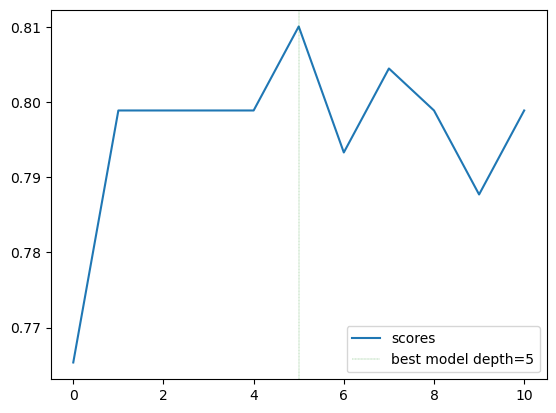

In [45]:
depths=np.arange(2,13)
dt_scores  =[]
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train,y_train)
    dt_scores.append(dt.score(X_test,y_test))
plt.plot(dt_scores,label='scores')
plt.axvline(5,linewidth=0.2,linestyle='--',color='green',label='best model depth=5')
plt.legend(loc='lower right');


In [46]:
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train,y_train)
y_pred_dt  = dt_model.predict(X_test)
dt_model_score = dt_model.score(X_test,y_test)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.7932960893854749

In [48]:
rf_score = rf.score(X_test,y_test)
bag = BaggingClassifier(base_estimator=dt,n_estimators=200,n_jobs=-1,oob_score=True)
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),
                  n_estimators=200, n_jobs=-1, oob_score=True)

In [49]:
bag.score(X_test,y_test)

0.8044692737430168

In [50]:
bag_score = bag.score(X_test,y_test)
bag_pred= bag.predict(X_test)
bag_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [51]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [52]:
gbc_pred = gbc.predict(X_test)
gbc_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [53]:
gbc.score(X_test,y_test)

0.8100558659217877

In [54]:
gbc_score = gbc.score(X_test,y_test)

In [55]:
output = pd.DataFrame({"Models":["LogisticRegressionClassifier","Support Vector Machine (SVM)","K-nearest neighbor Classifier","DecisionTreeClassifier","RandomForestClassifier","BaggingsClassifier","XGBClassifier"],"Scores":[logReg_score,svc_model_score,knn_score,dt_model_score,rf_score,bag_score,gbc_score]}).sort_values(ascending=False,by="Scores").reset_index(drop=True)
output

,Models,Scores
0,LogisticRegressionClassifier,0.810056
1,XGBClassifier,0.810056
2,BaggingsClassifier,0.804469
3,DecisionTreeClassifier,0.798883
4,RandomForestClassifier,0.793296
5,K-nearest neighbor Classifier,0.731844
6,Support Vector Machine (SVM),0.720670
